# Descargo Data  (100 wallets)

In [ ]:
import requests
import pandas as pd

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
url  = 'https://bitinfocharts.com/top-100-richest-bitcoin-addresses.html'

r = requests.get(url, headers=header)
tables = pd.read_html(r.text)

lista = tables[0]
lista

,"Balance, BTC",Addresses,% Addresses (Total),Coins,USD,% Coins (Total)
0,(0 - 0.001),20326799,51.46% (100%),"4,226 BTC","$205,866,195",0.02% (100%)
1,[0.001 - 0.01),9834445,24.9% (48.54%),"37,468 BTC","$1,825,362,369",0.2% (99.98%)
2,[0.01 - 0.1),6049796,15.32% (23.64%),"195,960 BTC","$9,546,755,251",1.04% (99.78%)
3,[0.1 - 1),2475219,6.27% (8.32%),"769,102 BTC","$37,468,977,088",4.07% (98.74%)
4,[1 - 10),664273,1.68% (2.06%),"1,694,679 BTC","$82,561,056,385",8.97% (94.67%)
5,[10 - 100),132430,0.34% (0.38%),"4,308,409 BTC","$209,896,304,039",22.81% (85.7%)
6,"[100 - 1,000)",13996,0.04% (0.04%),"3,992,223 BTC","$194,492,425,621",21.13% (62.89%)
7,"[1,000 - 10,000)",2076,0.01% (0.01%),"5,258,154 BTC","$256,165,821,166",27.84% (41.76%)
8,"[10,000 - 100,000)",85,0% (0%),"2,058,028 BTC","$100,262,662,241",10.89% (13.92%)
9,"[100,000 - 1,000,000)",3,0% (0%),"571,452 BTC","$27,839,885,831",3.03% (3.03%)


In [ ]:
second_part=  tables[3]
second_part.columns = tables[2].columns
all_data  = pd.concat([tables[2],second_part]).iloc[:,1:]
all_data.columns = ['address', 'balance', 'share','first_in', 'last_in', 'ins', 'first_out', 'last_out', 'outs']
all_data

,address,balance,share,first_in,last_in,ins,first_out,last_out,outs
0,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseowallet: Bina...,"288,126 BTC ($14,036,881,658)",1.53%,2018-10-18 12:59:18 UTC,2021-12-04 18:45:58 UTC,636,2018-10-18 13:19:26 UTC,2021-10-22 20:49:49 UTC,425.0
1,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...,"168,010 BTC ($8,185,080,674) / -10001 BTC",0.8893%,2019-08-16 10:00:29 UTC,2021-11-13 21:38:39 UTC,80,2020-02-02 17:43:14 UTC,2021-11-12 13:40:40 UTC,78.0
2,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,"115,316 BTC ($5,617,923,499) +356 BTC / +6815 BTC",0.6104%,2019-02-06 02:18:39 UTC,2021-12-05 06:54:53 UTC,570,2019-02-10 21:58:57 UTC,2021-11-08 23:13:40 UTC,63.0
3,37XuVSEpWW4trkfmvWzegTHQt7BdktSKUswallet: 7760...,"94,505 BTC ($4,604,083,415)",0.5002%,2019-09-06 03:30:05 UTC,2021-11-14 20:13:31 UTC,120,2021-07-04 03:56:36 UTC,2021-07-04 04:10:14 UTC,2.0
4,38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67 2-of-6walle...,"84,067 BTC ($4,095,562,062) / -9499 BTC",0.4450%,2016-03-14 22:20:01 UTC,2021-11-17 04:56:51 UTC,271,2016-03-15 17:57:11 UTC,2021-11-17 04:56:51 UTC,151.0
...,...,...,...,...,...,...,...,...,...
76,1MLsZmbT3mgmm6zLkTR26yJHVfn8BSdqqd,"9,901 BTC ($482,348,876)",0.05241%,2018-12-04 02:28:38 UTC,2021-07-21 17:06:18 UTC,96,NaN,NaN,NaN
77,bc1qmjpguunz9lc7h6zf533wtjc70ync94ptnrjqmk,"9,901 BTC ($482,337,720)",0.05241%,2021-07-29 19:29:09 UTC,2021-07-29 19:29:09 UTC,1,NaN,NaN,NaN
78,bc1qyr9dsfyst3epqycghpxshfmgy8qfzadfhp8suk,"9,900 BTC ($482,328,455)",0.05241%,2021-07-29 19:29:09 UTC,2021-07-29 19:29:09 UTC,1,NaN,NaN,NaN
79,bc1q8qg2eazryu9as20k3hveuvz43thp200g7nw7qy,"9,900 BTC ($482,311,236)",0.05240%,2021-07-29 19:29:09 UTC,2021-07-29 19:29:09 UTC,1,NaN,NaN,NaN


## Descargo data de las 100.000 wallets principales

In [ ]:
pags = 100
for pag in range(2,pags+2):
  print(f"Procesando pagina {pag} de {pags}    " , end='\r')
  url = f'https://bitinfocharts.com/top-100-richest-bitcoin-addresses-{pag}.html'
  r = requests.get(url, headers=header)
  tables = pd.read_html(r.text)

  second_part=  tables[1]
  second_part.columns = tables[0].columns
  all_page = pd.concat([tables[0], second_part]).iloc[:,1:]
  all_page.columns = ['address', 'balance', 'share','first_in', 'last_in', 'ins', 'first_out', 'last_out', 'outs']
  all_data  = pd.concat([all_data, all_page])
all_data

,address,balance,share,first_in,last_in,ins,first_out,last_out,outs
0,34xp4vRoCGJym3xR7yCVPFHoCNxv4Twseowallet: Bina...,"288,126 BTC ($14,036,881,658)",1.53%,2018-10-18 12:59:18 UTC,2021-12-04 18:45:58 UTC,636,2018-10-18 13:19:26 UTC,2021-10-22 20:49:49 UTC,425.0
1,bc1qgdjqv0av3q56jvd82tkdjpy7gdp9ut8tlqmgrpmv24...,"168,010 BTC ($8,185,080,674) / -10001 BTC",0.8893%,2019-08-16 10:00:29 UTC,2021-11-13 21:38:39 UTC,80,2020-02-02 17:43:14 UTC,2021-11-12 13:40:40 UTC,78.0
2,1P5ZEDWTKTFGxQjZphgWPQUpe554WKDfHQ,"115,316 BTC ($5,617,923,499) +356 BTC / +6815 BTC",0.6104%,2019-02-06 02:18:39 UTC,2021-12-05 06:54:53 UTC,570,2019-02-10 21:58:57 UTC,2021-11-08 23:13:40 UTC,63.0
3,37XuVSEpWW4trkfmvWzegTHQt7BdktSKUswallet: 7760...,"94,505 BTC ($4,604,083,415)",0.5002%,2019-09-06 03:30:05 UTC,2021-11-14 20:13:31 UTC,120,2021-07-04 03:56:36 UTC,2021-07-04 04:10:14 UTC,2.0
4,38UmuUqPCrFmQo4khkomQwZ4VbY2nZMJ67 2-of-6walle...,"84,067 BTC ($4,095,562,062) / -9499 BTC",0.4450%,2016-03-14 22:20:01 UTC,2021-11-17 04:56:51 UTC,271,2016-03-15 17:57:11 UTC,2021-11-17 04:56:51 UTC,151.0
...,...,...,...,...,...,...,...,...,...
76,19UcAYL5bEEEtQWtbL3MY871xQgt6kvsLYwallet: 3810...,"171.91 BTC ($8,375,249)",0.00090997197901412%,2018-01-28 13:41:29 UTC,2020-08-10 23:48:29 UTC,47,2018-02-28 10:45:16 UTC,2019-06-12 08:18:27 UTC,23.0
77,1EHn6vqW4HixCaXXJHNcDvnPXFacBqsrh4,"171.87 BTC ($8,373,359)",0.00090976669454045%,2020-10-12 10:35:11 UTC,2021-09-09 12:48:54 UTC,2,NaN,NaN,NaN
78,3CS9B7GwRjD6oXwAd68JSy8Z6Hb7ion2Uh,"171.87 BTC ($8,373,335)",0.00090976403539635%,2021-02-21 16:44:36 UTC,2021-09-09 12:48:54 UTC,2,NaN,NaN,NaN
79,1NdomgdWm7E22kSx5TWG7iUwEw3m7fuWx6,"171.86 BTC ($8,372,549)",0.00090967867230292%,2021-03-25 19:36:13 UTC,2021-11-30 21:52:43 UTC,31,NaN,NaN,NaN


# Analizo los cambios

In [ ]:
changes = []
nuevas = []
for i in range(len(all_data)):
    row = all_data.iloc[i]
    balance = row['balance']
    cambios = balance.find('/')
    if cambios != -1:
        win = row['balance'].find('+')
        loss = row['balance'].find('-')
        b = float(row['balance'][:row['balance'].find(' BTC')].replace(',',''))

        if win != -1:
            cambios = row['balance'][win:]
            cambio_wk = float(cambios[:cambios.find(' BTC')].replace('+',''))
            if cambio_wk != b:
                changes.append({'wallet':row['address'], 'cambio_week':cambio_wk})
                
            else:
                nuevas.append({'wallet':row['address'], 'cambio_week':cambio_wk})
        if loss != -1:
            cambios = row['balance'][loss:]
            cambio_wk = float(cambios[:cambios.find(' BTC')].replace('-',''))
            changes.append({'wallet':row['address'], 'cambio_week': -cambio_wk})

# Analizo las que cambiaron saldo

In [ ]:
# Armo DataFrame
df = pd.DataFrame(changes)

df.cambio_week.describe()

count       39.000000
mean      1708.289744
std       7646.469041
min     -10001.000000
25%       -539.755000
50%        427.450000
75%       3375.000000
max      39149.000000
Name: cambio_week, dtype: float64

In [ ]:
# Agregado
df.cambio_week.sum()

66623.29999999999

In [ ]:
# Cuantas ganaron
len(df.loc[df.cambio_week > 0])

23

# Analizo las nuevas

In [ ]:
nuevas_df = pd.DataFrame(nuevas)
nuevas_df

,wallet,cambio_week
0,38BJFrRagm6vJprZnCtmrxQdbMU7jxTtX1,15073.00
1,bc1qtef0p08lputg4qazhx2md43ynhc9kp20pn297qnz68...,10001.00
2,bc1qr6gmsxylg4e9sae27syl3pdvu9ntzv20y58hkw,9848.00
3,1Cd1q5hW3DySdb3b1PzeQ8Jk2D5ajBjvcg,9331.00
4,1CsShhaM1XijNaoVrzEGhrGkjdS8vXCdtD,8600.00
...,...,...
768,3AieaARs6jpzp4DRPheaPFPsE3UzefRXbW,173.35
769,1LZAHicbSsWym9qmmEbPSihvaWKxMwrUU9,172.20
770,3N5XLwkbtG5idMHFTwChPtYk4FTnPvF9HW,172.08
771,3FDTDCw9xUXsRTmVggJQmoLTCapVtp6P5i,172.02


,cambio_week
count,773.000000
mean,814.713208
std,1285.941138
min,171.950000
25%,239.260000
50%,374.700000
75%,886.010000
max,15073.000000


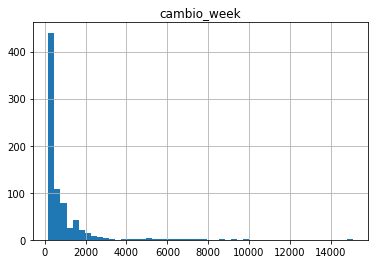

In [ ]:
# estadisticas de las nuevas

nuevas_df.hist(bins=50)
nuevas_df.describe()

In [ ]:
# Cuanto ganaron en total
nuevas_df.sum()

wallet         38BJFrRagm6vJprZnCtmrxQdbMU7jxTtX1bc1qtef0p08l...
cambio_week                                               629773
dtype: object